In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [47]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [48]:
wine_dataset.shape

(1599, 12)

In [49]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\ASUS TUF GAMING\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


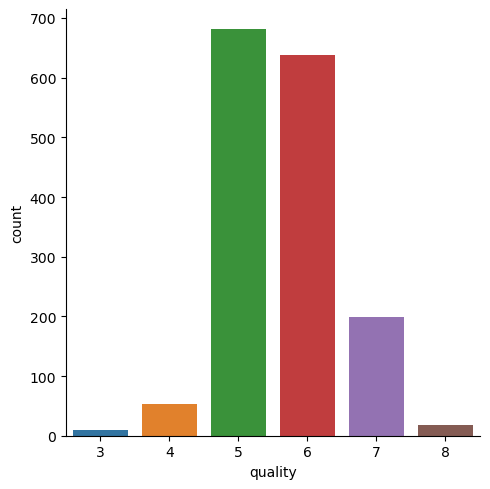

In [52]:
sns.catplot(x ='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

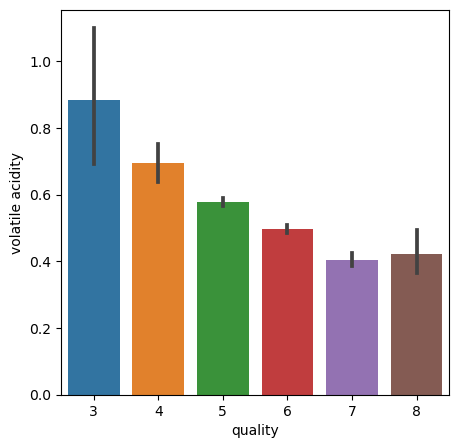

In [53]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)


<Axes: xlabel='quality', ylabel='citric acid'>

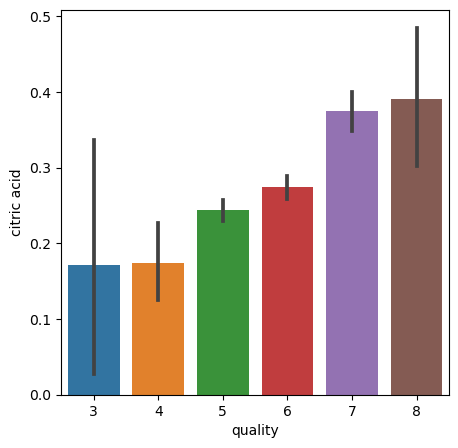

In [54]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataset)


In [55]:
correlation = wine_dataset.corr()

<Axes: >

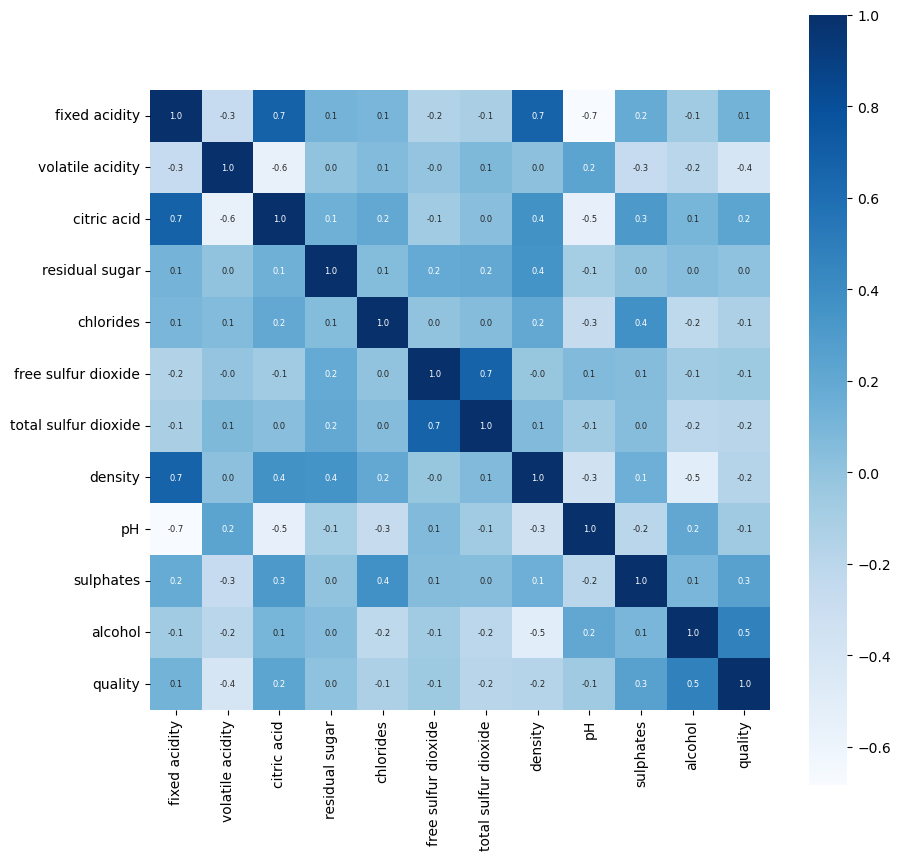

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':6}, cmap = 'Blues')

In [57]:
x = wine_dataset.drop('quality', axis = 1)

In [58]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [59]:
y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [60]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [62]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [63]:
from sklearn.metrics import r2_score

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, (y_pred > 0.5).astype(int))
r_squared = r2_score(y_test, y_pred)

print("Linear Regression Accuracy:", accuracy_lr)
print("R-squared:", r_squared)


Linear Regression Accuracy: 0.89375
R-squared: 0.24666522898685572


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score


model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(x_train, y_train)
y_pred_logreg = model_logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
y_pred_proba_logreg = model_logreg.predict_proba(x_test)[:, 1]
r_squared_logreg = r2_score(y_test, y_pred_proba_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression R-squared:", r_squared_logreg)


Logistic Regression Accuracy: 0.89375
Logistic Regression R-squared: 0.29190206977992317


In [65]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

y_pred_dt = model_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
y_pred_proba_dt = model_dt.predict_proba(x_test)[:, 1]
r_squared_dt = r2_score(y_test, y_pred_proba_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree R-squared:", r_squared_dt)


Decision Tree Accuracy: 0.915625
Decision Tree R-squared: 0.17486390984624212


In [66]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
y_pred_proba_rf = model_rf.predict_proba(x_test)[:, 1]
r_squared_rf = r2_score(y_test, y_pred_proba_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest R-squared:", r_squared_rf)


Random Forest Accuracy: 0.925
Random Forest R-squared: 0.4895402540349537


In [67]:
import pandas as pd

model_data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_logreg, accuracy_dt, accuracy_rf],
    'R-squared': [r_squared, r_squared_logreg, r_squared_dt, r_squared_rf]
}
results_df = pd.DataFrame(model_data)
print(results_df)


                 Model  Accuracy  R-squared
0    Linear Regression  0.893750   0.246665
1  Logistic Regression  0.893750   0.291902
2        Decision Tree  0.915625   0.174864
3        Random Forest  0.925000   0.489540


In [69]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model_rf.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\ASUS TUF GAMING\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model_rf.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\ASUS TUF GAMING\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
